In [146]:
import pandas as pd
import numpy as np
import gzip
import sys
import os
import seaborn as sns
%pylab inline
sys.path.append('../../src/')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import data.gtex as gtex
import data.predixcan as predixcan

In [4]:
measured = gtex.load_expression()

In [5]:
measured.head()

,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-113IC,GTEX-113JC,GTEX-117XS,GTEX-117YW,GTEX-1192W,GTEX-11DXW,GTEX-11DXX,...,GTEX-ZVE2,GTEX-ZVP2,GTEX-ZVT2,GTEX-ZVT3,GTEX-ZVT4,GTEX-ZVTK,GTEX-ZVZP,GTEX-ZVZQ,GTEX-ZXES,GTEX-ZXG5
name,,,,,,,,,,,,,,,,,,,,,
RP11-34P13.7,0.182160,2.176759,-0.327403,-1.563249,-0.798158,-0.690825,-1.215465,-0.626521,-0.635544,2.753304,...,-0.709723,-0.114862,1.141439,-2.263599,-0.107422,-1.427651,2.103773,-1.185074,0.430727,-0.070303
CICP27,0.182160,1.073190,-0.479942,-1.845969,-0.866108,-1.099875,-0.973342,-0.304087,-0.626521,1.984522,...,-1.009605,-0.025883,0.758123,-2.263599,-0.152166,-1.073190,2.371853,-1.350077,0.430727,-0.048081
RP11-34P13.15,0.189683,0.488256,1.314165,-2.518087,-1.127368,-0.573403,-1.192569,-0.556058,-0.331307,0.099988,...,-0.311840,0.055485,0.622028,-1.643425,0.949861,-1.770186,0.768016,-1.170281,-0.319612,-0.107422
RP11-34P13.16,0.753204,0.304087,1.514917,-2.518087,-0.955682,-1.170281,-0.753204,0.126034,-0.327403,-0.238866,...,-0.414557,-0.370628,0.386515,-2.040526,0.414557,-1.888215,-0.114862,-2.263599,-0.509189,-0.197217
RP11-34P13.14,0.513403,0.343047,1.703388,-1.806781,-0.327403,-1.469885,0.273250,0.662931,0.538879,-0.382535,...,-0.250294,-1.563249,0.204762,-1.314165,1.350077,-0.829044,-0.926893,-1.387820,-0.599750,0.777984


In [6]:
predicted = predixcan.load_predicted('../../data/predixcan/predictions.minus-hla.alpha1.tsv.gz')

In [7]:
predicted.head()

,GTEX-P4PP,GTEX-PWO3,GTEX-SNOS,GTEX-PW2O,GTEX-RU72,GTEX-VJYA,GTEX-U3ZH,GTEX-PLZ4,GTEX-P44G,GTEX-WOFL,...,GTEX-YF7O,GTEX-11TTK,GTEX-Y3IK,GTEX-12WSE,GTEX-1212Z,GTEX-YEC3,GTEX-11ONC,GTEX-ZZPT,GTEX-ZVTK,GTEX-XBEC
UBE2Q1,-0.121079,-0.066371,0.135165,0.043322,-0.167153,0.059409,-0.064592,0.117333,0.053394,-0.029087,...,0.118536,0.034042,0.078485,-0.042171,0.019912,-0.001645,0.131741,0.083236,0.007399,-0.054157
RNF14,-0.344138,-0.144490,-0.348426,0.056915,-0.163442,-0.328642,-0.360858,-0.360858,0.043541,-0.165200,...,-0.159453,-0.163442,-0.137155,-0.174767,-0.174767,0.026638,-0.339966,-0.159804,-0.328642,-0.142551
UBE2Q2,0.185559,0.194231,-0.018047,0.290495,0.092135,-0.163189,0.311871,0.441576,0.089022,0.124410,...,0.226836,0.209874,-0.072307,-0.020016,0.147939,0.084239,0.293504,0.169062,0.191851,0.216087
RNF10,-0.032507,-0.068161,-0.056125,-0.047314,0.041432,-0.046286,0.013369,-0.038442,-0.034058,-0.020994,...,-0.026834,-0.049426,0.045150,0.031421,-0.047524,-0.007546,0.034918,-0.029033,-0.029078,-0.063987
RNF13,0.706117,0.000000,0.353058,0.000000,0.000000,0.044834,0.000000,0.000000,0.000000,0.353058,...,0.000000,0.353058,0.397892,0.000000,0.000000,0.353058,0.353058,0.000000,0.000000,0.000000


In [8]:
combined = pd.concat([measured, predicted],
                      keys=['Measured', 'Predicted'])
combined = combined.swaplevel(0, 1)
found_in_both = set(measured.index).intersection(predicted.index)
combined = combined.ix[found_in_both, :]
combined = combined.dropna(axis=1,)

In [9]:
combined.head()

GTEX-111YS  GTEX-1122O  GTEX-1128S  GTEX-113IC  GTEX-113JC  \
name                                                                           
UBE2Q1 Measured     1.060130    0.823842   -2.753304    0.296352   -1.003470   
       Predicted   -0.014974    0.090753    0.092210   -0.043855    0.024695   
RNF14  Measured     0.635544   -0.055485   -0.714487    0.463414   -1.397571   
       Predicted   -0.159453   -0.360858   -0.349533   -0.360858   -0.339966   
UBE2Q2 Measured    -0.564709   -0.728877    0.025883    1.672655    0.447011   

                  GTEX-117XS  GTEX-117YW  GTEX-1192W  GTEX-11DXW  GTEX-11DXX  \
name                                                                           
UBE2Q1 Measured    -1.427651   -0.829044   -0.955682   -0.798158    1.113516   
       Predicted    0.046845    0.056050    0.135112   -0.079794   -0.002272   
RNF14  Measured    -1.866676   -1.866676   -1.331907   -1.615536    0.350900   
       Predicted   -0.360858   -0.165200   -0.344138   -0.360858   -0.334571   
UBE2Q2 Measured    -0.882362   -0.339128   -0.129761   -0.915590   -0.608625   

                    ...      GTEX-ZVE2  GTEX-ZVP2  GTEX-ZVT2  GTEX-ZVT3  \
name                ...                                                   
UBE2Q1 Measured     ...      -0.390502   0.204762   0.728877  -1.231090   
       Predicted    ...       0.097856   0.086071   0.142650   0.056167   
RNF14  Measured     ...       1.538633   0.653748   0.398495  -0.394495   
       Predicted    ...      -0.319075  -0.339966  -0.313679  -0.323246   
UBE2Q2 Measured     ...      -0.997372   0.719267  -0.250294   1.148560   

                  GTEX-ZVT4  GTEX-ZVTK  GTEX-ZVZP  GTEX-ZVZQ  GTEX-ZXES  \
name                                                                      
UBE2Q1 Measured   -0.346970  -0.938315   1.469885  -0.159651   1.359332   
       Predicted   0.045658   0.007399   0.101746  -0.038023   0.004101   
RNF14  Measured   -1.984522  -1.350077  -0.608625  -0.219888   0.122308   
       Predicted  -0.334571  -0.328642  -0.345544  -0.174767  -0.328642   
UBE2Q2 Measured   -0.319612   1.417482  -1.086436   0.242672   0.148427   

                  GTEX-ZXG5  
name                         
UBE2Q1 Measured    0.055485  
       Predicted  -0.058071  
RNF14  Measured   -0.798158  
       Predicted  -0.360858  
UBE2Q2 Measured    0.839516  

[5 rows x 338 columns]

In [ ]:
full_correlation = combined.T.corr()

In [79]:
full_correlation.to_csv('../../data/predixcan/gtex.full.correlation.tsv.gz',
                       compression='gzip',
                       sep='\t')

In [11]:
measured_vs_predicted = full_correlation.xs('Measured', level=1).T.xs('Predicted', level=1)

In [12]:
measured_vs_predicted[measured_vs_predicted.columns[:5]].head(5)

name,UBE2Q1,RNF14,UBE2Q2,RNF10,RNF13
name,,,,,
UBE2Q1,0.076979,-0.055182,0.023002,-0.099670,-0.009286
RNF14,0.004466,0.178147,0.002010,0.031206,-0.075317
UBE2Q2,-0.073829,-0.006907,0.105296,-0.046268,0.099965
RNF10,-0.134089,-0.061876,-0.056943,0.038593,-0.076906
RNF13,-0.032777,-0.047066,-0.143675,0.137139,0.082196


In [24]:
measured_vs_predicted.to_csv('../../data/predixcan/measured_vs_predicted.correlation.full.tsv',
                            sep="\t")

In [26]:
measured_vs_measured = full_correlation.xs('Measured', level=1).T.xs('Measured', level=1)
measured_vs_measured.to_csv('../../data/predixcan/measured_vs_measured.correlation.full.tsv',
                            sep="\t")

In [27]:
predicted_vs_predicted = full_correlation.xs('Predicted', level=1).T.xs('Predicted', level=1)
predicted_vs_predicted.to_csv('../../data/predixcan/predicted_vs_predicted.correlation.full.tsv',
                            sep="\t")

### To just get a feel for the data, let's see all the plots that were show and not shown in Predixcan Main Paper

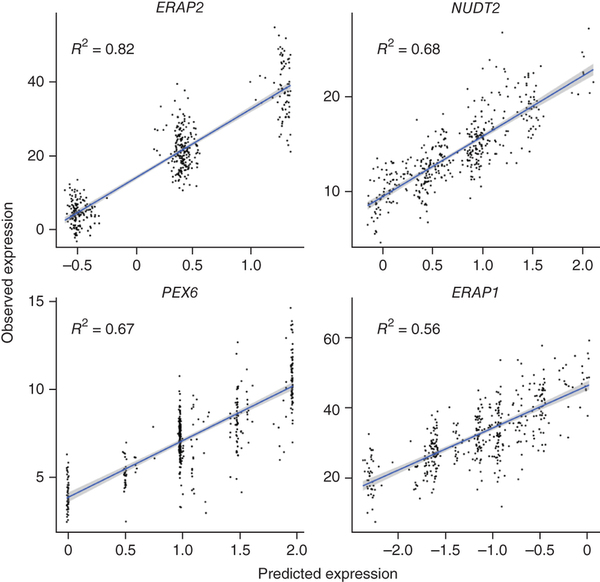

In [28]:
paper_genes = ['ERAP2', 'NUDT2', 'PEX6', 'ERAP1']

In [145]:
predicted_correlation = np.diag(measured_vs_predicted)
predicted_correlation = pd.DataFrame(predicted_correlation)
predicted_correlation.index = measured_vs_predicted.columns
predicted_correlation.ix[paper_genes]

,0
name,
ERAP2,0.676513
NUDT2,0.461575
PEX6,0.555812
ERAP1,0.287413


In [152]:
combined_gene_df = []
for gene in paper_genes:
    gene_df = combined.ix[gene].T
    gene_df['Gene'] = gene
    combined_gene_df.append(gene_df)
combined_gene_df = pd.concat(combined_gene_df)

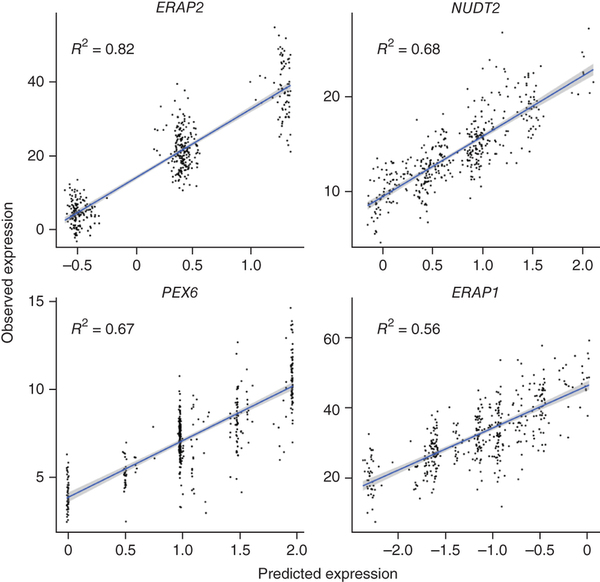

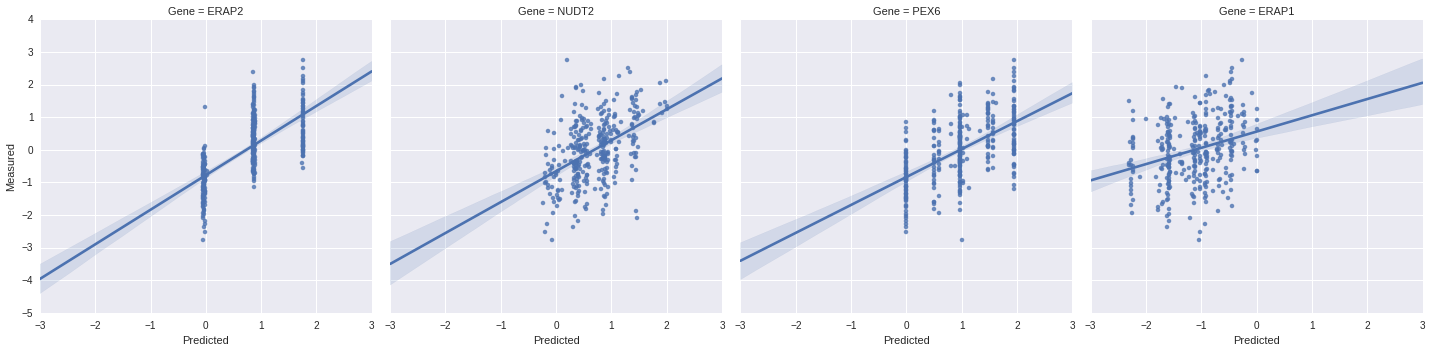

In [158]:
sns.lmplot('Predicted', 'Measured', col='Gene', data=combined_gene_df)
from IPython.display import Image
Image('http://www.nature.com/ng/journal/v47/n9/images_article/ng.3367-F5.jpg', height="300", width="300")

#### So far, so good in terms of our estimation. Let's fit linear models and save the results.'

In [159]:
import statsmodels.api as sm

In [208]:
# Toy example
gene = 'ERAP2'
model = sm.OLS(combined.ix[gene,'Measured'], combined.ix[gene, 'Predicted'])
results = model.fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     ('ERAP2', 'Measured')   R-squared:                       0.194
Model:                               OLS   Adj. R-squared:                  0.191
Method:                    Least Squares   F-statistic:                     80.87
Date:                   Sun, 25 Oct 2015   Prob (F-statistic):           1.77e-17
Time:                           14:36:17   Log-Likelihood:                -438.20
No. Observations:                    338   AIC:                             878.4
Df Residuals:                        337   BIC:                             882.2
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------

In [211]:
np.std(results.resid)

0.8211695755782715

In [210]:
coefficients = {}
coefficients[gene] = (results.params, results.bse)
residuals = {}
residuals[gene] = results.resid

In [187]:
coefficients, residuals[gene].head()

({'ERAP2': ((ERAP2, Predicted)    0.448616
   dtype: float64, (ERAP2, Predicted)    0.049886
   dtype: float64)}, GTEX-111YS   -1.023571
 GTEX-1122O   -0.802536
 GTEX-1128S    0.626108
 GTEX-113IC    0.078283
 GTEX-113JC    0.747230
 dtype: float64)

In [218]:
genes = combined.index.get_level_values(0)
coefficients = {}
residuals = {}

In [223]:
results.params.values[0]

0.2406357218570683

In [224]:
for gene in genes:
    model = sm.OLS(combined.ix[gene,'Measured'], combined.ix[gene, 'Predicted'])
    results = model.fit()
    coefficients[gene] = (results.params.values[0], results.bse.values[0])
    residuals[gene] = results.resid

In [194]:
residuals_df = pd.DataFrame.from_dict(residuals, orient='index')

In [195]:
residuals_df.head()

,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-113IC,GTEX-113JC,GTEX-117XS,GTEX-117YW,GTEX-1192W,GTEX-11DXW,GTEX-11DXX,...,GTEX-ZVE2,GTEX-ZVP2,GTEX-ZVT2,GTEX-ZVT3,GTEX-ZVT4,GTEX-ZVTK,GTEX-ZVZP,GTEX-ZVZQ,GTEX-ZXES,GTEX-ZXG5
A2M,-0.771344,-0.496332,-0.847411,-2.262840,0.905703,0.671178,-0.257638,0.299022,0.123698,-1.095567,...,0.307705,-1.004540,-0.982902,-0.247152,-0.174039,-0.870201,-0.682609,0.346787,-1.422883,-1.872697
A4GALT,-0.122091,-1.437904,-0.053141,-2.050005,-0.059717,1.483174,0.743860,0.747602,1.616211,-2.352712,...,0.951563,0.106473,-0.820637,0.144646,1.461991,0.520282,-0.503730,1.537048,-0.964963,-1.814097
AACS,0.037066,-1.406510,2.349426,0.001322,-0.535400,1.128191,1.843245,0.393010,0.735432,-1.541961,...,-1.268252,0.930749,-0.105887,0.498033,0.173543,1.304295,0.036786,1.375711,-0.711217,0.339407
AAGAB,0.323449,-0.051377,0.742155,1.852680,-1.976394,1.133901,-1.689061,-0.647370,-0.822713,-0.119795,...,0.140539,0.351868,0.180166,-0.444178,-1.235864,-0.757682,-0.815730,-0.311517,-0.660435,-0.032568
AAK1,-0.994842,-0.340208,2.697165,-0.654927,0.846673,1.041740,2.089583,0.597043,0.412951,0.098977,...,-0.226689,-1.177864,-0.975821,0.698634,0.725276,1.843311,-0.787137,0.475732,-0.786493,1.274875


In [212]:
std_errors = residuals_df.std(axis=1)
std_errors.sort()

In [213]:
std_errors.head()

HBA2       0.682191
XRRA1      0.688829
CPA5       0.694524
SLC12A1    0.700996
AFAP1      0.706581
dtype: float64

In [214]:
std_errors.tail()

KDM2B       0.986633
LIPH        0.986633
ABCD2       0.986633
INCENP      0.986633
SLC16A14    0.986633
dtype: float64

### Why do multiple genes have the same standard error and why is it bounded to 0.986 (bounded most likely because of normalization step by GTEX)?

### Lowest standard deviations

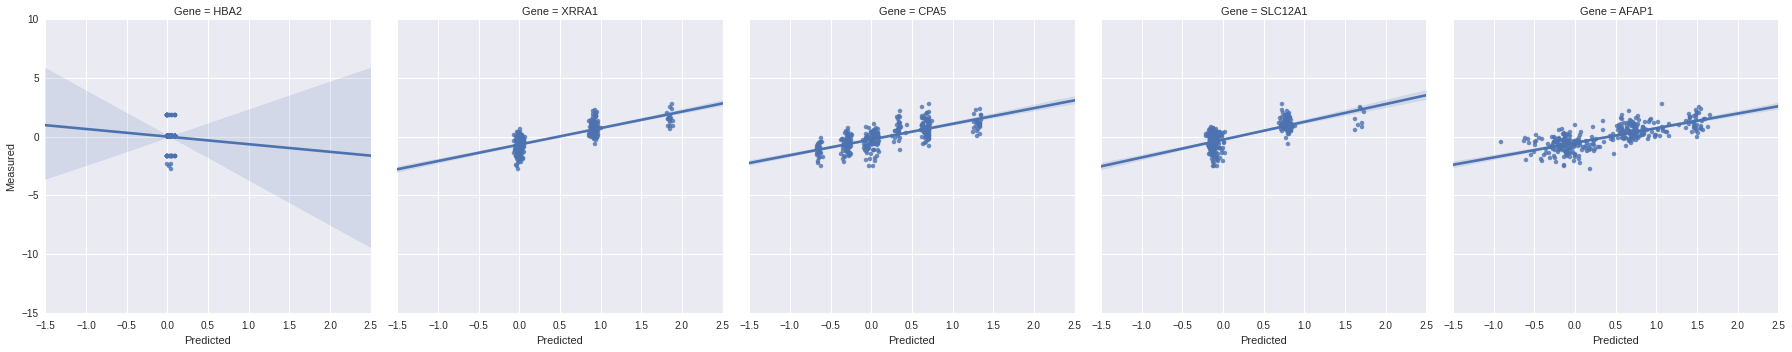

In [216]:
combined_gene_df = []
for gene in std_errors.head().index:
    gene_df = combined.ix[gene].T
    gene_df['Gene'] = gene
    combined_gene_df.append(gene_df)
combined_gene_df = pd.concat(combined_gene_df)
sns.lmplot('Predicted', 'Measured', col='Gene', data=combined_gene_df)

### Highest standard deviations

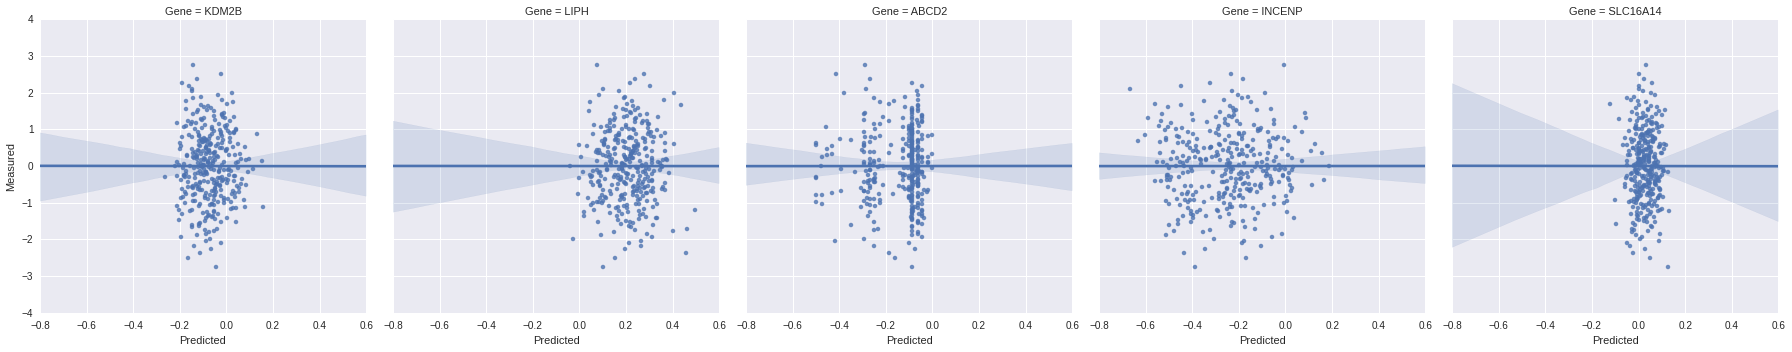

In [215]:
combined_gene_df = []
for gene in std_errors.tail().index:
    gene_df = combined.ix[gene].T
    gene_df['Gene'] = gene
    combined_gene_df.append(gene_df)
combined_gene_df = pd.concat(combined_gene_df)
sns.lmplot('Predicted', 'Measured', col='Gene', data=combined_gene_df)

#### Combine coef, std error on coef, and residual std.

In [229]:
combined_df = pd.concat([pd.DataFrame(coefficients), pd.DataFrame(std_errors).T])
combined_df.index = ['Coefficient', 'SE-Coef', 'SD-Residuals']

In [230]:
combined_df

,A2M,A4GALT,AACS,AAGAB,AAK1,AAMP,AANAT,AARS,AARS2,AARSD1,...,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZWILCH,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Coefficient,0.025215,0.482674,-0.071435,0.179356,-1.603465,0.010884,0.222718,1.161682,0.110487,-0.020868,...,0.141873,0.346763,-1.079445,0.714465,-0.014104,0.446673,0.481809,0.239906,-0.170556,-0.123236
SE-Coef,0.174900,0.091171,0.210400,0.428029,1.237511,0.450089,0.091992,1.462688,0.445290,0.378384,...,0.304549,1.267211,0.725990,0.698448,0.711294,0.414923,0.276897,0.085134,0.432879,0.942281
SD-Residuals,0.986583,0.929124,0.986380,0.986217,0.984121,0.986629,0.972074,0.985114,0.986500,0.986625,...,0.986304,0.986494,0.981833,0.984678,0.986632,0.984122,0.981343,0.966543,0.986339,0.986600
